# Names and IDs
 1. Fadi zoabi ID: 214026775
 2. Husein Hasanin ID : 213971054

---
# Section 1
---

# I. Naive Bayes (20 pts)

In this part we will test digits classification on the MNIST dataset, using Bernoulli Naive Bayes (a generative model), in contrast to the Multivariate Logistic Regression (a discriminative model) we saw.

The MNIST dataset contains 28x28 grayscale images of handwritten digits between 0 and 9 (10 classes). For mathmatical analysis clarity, and for matching expected API, each image faltten to create a 1D array with 784 elements.

### Loading the MNIST dataset
Load the MNIST data set. The digits dataset is one of datasets scikit-learn comes with that do not require the downloading of any file from some external website. Use

```
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
```

To fetch the original data. Each image is a 28 by 28 pixels in grayscale range [0,255] and the corresponding label is an integer $y\in [0,9]$. Each image should be transformed into a 1D integer array $x\in [0,255]^{784}$.

```
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)
```

Divide your data into train and test sets in a 80-20 ration split. And plot a single sample of each digit as the original image, so you get a feeling how the data looks like.

In [13]:
# Implement here
from keras.datasets import mnist
from sklearn.model_selection import train_test_split

# Load the MNIST dataset
(x_train_full, y_train_full), (x_test_full, y_test_full) = mnist.load_data()

# Reshape the data
x_train_full = x_train_full.reshape(x_train_full.shape[0], 784)
x_test_full = x_test_full.reshape(x_test_full.shape[0], 784)

# Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(
    x_train_full, y_train_full, test_size=0.2, random_state=42
)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


### Bernoulli Naive Bayes
If we know how the digits are generated, then we know how to classify them (simply choose the digit class which will maximize the posterior probability) --- but which model should we use for describing the digits generation?

In this part we will try a very simplified model of digits creation (which is obviously not the same as the "real" model), using a Naive Bayes over an underlying Bernoulli distribution --- that is, we will assume that given a digit class, the pixels of the images are the result of independent coin flips, each with its own "head" probability.

Note that since we assume each pixl is either 0 (black) or 1 (white), we will need to adjust (preprocess) our data accrodingly (see below).

So, the model is stated as follows:
$$
\begin{align}
\text{Domain} && x \in \{0,1\}^{784} \\
\text{Prior} && \pi_j = \Pr(y=j) \\
\text{Likelihood} && P_j(x) = \Pr(x | y=j) \\
\end{align}
$$

Where for each $i\in 0\ldots 784$ it holds that the probability of a pixel $i$ to be on given that the digit is $j$ is:
$$
P_{ji}(x_i) = \Pr(x_i | y=j) =
\begin{cases}
p_{ji} & \text{if } x_i=1 \\
1-p_{ji} & \text{if } x_i=0 \\
\end{cases}
$$


#### Question 1
Research the differences between the three types of Naive Bayes classifiers: Bernoulli NB, Multinomial NB, and Gaussian NB.
Describe in your own words what makes each type unique and specify the kind of tasks for which you would prefer each one.

#### Answer 1
Naive Bayes classifiers:
  1.	Bernoulli NB: Use when the features are binary or when the presence/absence of features is more important than their frequency.
  2.	Multinomial NB: Use for text-based tasks with feature counts or frequencies, such as document classification.
  3.	Gaussian NB: Use for datasets with continuous numerical features that approximate a normal distribution.

#### Question 2
Train a Naive Bayes classifier using the training data and apply predictions on the test data. Use the [sklearn.naive_bayes.BernoulliNB](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html) implementation (see the [source code for sklearn.naive_bayes](https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/naive_bayes.py) for details).

Remember we need to preprocess the data in this case such that each pixel would become either black (0) or white (1). For this purpose, use the `binarize` parameter of the `BernoulliNB` function. Set this value to $0$ (this is the default), which in this case would mean every pixel with non-zero value will be set to 1.

1. Plot the confusion matrix of your classifier, as claculated on the test data (it is recommended to use [sklearn.metrics.confusion_matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)). Calculate the total accuracy (fraction of correctly classified images), and summarize the results in your own words.

    A **confusion matrix** for a multi-class classifier is a table that summarizes the performance of the model by comparing the predicted class labels to the true class labels: Each row represents the actual class, and each column represents the predicted class. The diagonal elements indicate the number of correct predictions for each class. Off-diagonal elements show misclassifications (e.g., how many times one class was predicted as another).


2. Plot the mean image of each class (estimated $\hat{p}_{ji}$) and generate one sample of each class (remember, you can do this since this is a generative model). You will need to access the `feature_log_prob_` attribute of the trained model.

3. Think of a way you can find the optimal threshold of the binarization part. **There is no need to actually perform this task --- just describe what you would have done.**

#### Answer 2
3. for every threshold t that is between 0 to 1 in 0.1 steps I calulate the accurcy of the model on the test and take the best threshold with the most accuracy

Total Accuracy: 0.83025


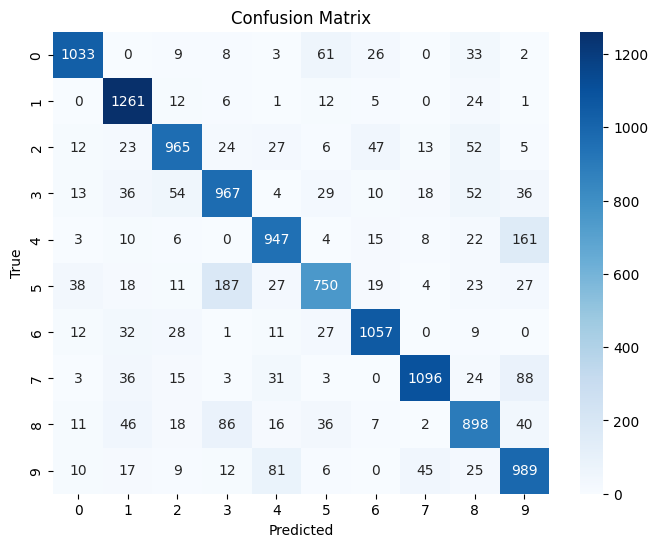

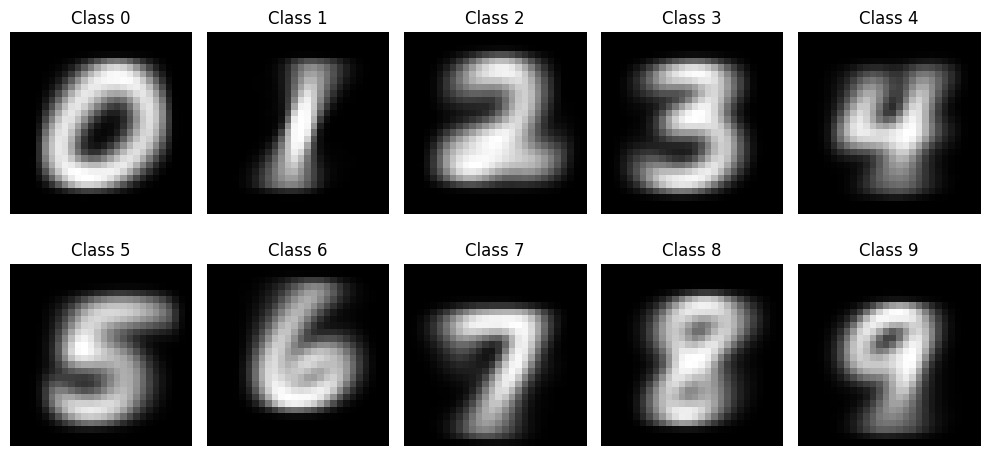

In [ ]:
# code goes here
# imports
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np
import matplotlib.pyplot as plt

bernoli = BernoulliNB(binarize=0)
bernoli.fit(x_train, y_train)
y_pred = bernoli.predict(x_test)

# Calculate the total accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print("Total Accuracy:", test_accuracy)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Plot the mean Image of each class
mean_images = bernoli.feature_log_prob_
plt.figure(figsize=(10, 5))
for i in range(10):
  plt.subplot(2, 5, i + 1)
  mean_image = np.exp(mean_images[i]).reshape(28, 28)
  plt.imshow(mean_image, cmap='gray')
  plt.title(f'Class {i}')
  plt.axis('off')

plt.tight_layout()
plt.show()

# # find the best threshold
# best_t, test_acc = 0 , 0
# for threshold in np.arange(0, 1.1, 0.1):
#     bernoli = BernoulliNB(binarize=threshold)
#     bernoli.fit(x_train, y_train)
#     y_pred = bernoli.predict(x_test)
#     accuracy = accuracy_score(y_test, y_pred)
#     if test_acc < accuracy:
#         best_t = threshold
#         test_acc = accuracy

# print(f"Best threshold: {best_t}, Accuracy: {test_acc}")

# II. Perceptron Algorithm (20 points)
1.	Provide an example of four samples in $R^2$ of a non-linearly separable dataset and describe the behavior of the perceptron algorithm when applied to it.

In [ ]:
# 4 samples in R^2
samples = [((1,3),1),((2,5),1),((7,1),-1),((9,4),-1)]

### Behavior of the Perceptron Algorithm

The perceptron algorithm iteratively updates its weights and bias to classify samples correctly. However, when applied to a non-linearly separable dataset, the following issues arise:

- **Persistent Misclassification**: Since no linear boundary can separate the dataset into distinct classes, the algorithm continues to encounter misclassified points. As a result, the weight and bias updates oscillate without reaching a stable solution.  

- **Lack of Convergence**: The perceptron is designed for linearly separable datasets. In non-linearly separable cases, the algorithm fails to find a hyperplane that correctly classifies all samples, leading to infinite updates and no convergence.


2. Prove no-convergence for this case.



### **Proof of Non-Convergence**

1. **Perceptron Update Rule**:  
   The perceptron updates its weights and bias as follows:


                       w <- w + y_i * x_i b <- b + y_i


where:
- `w` is the weight vector.
- `b` is the bias.
- `y_i` is the class label (`-1` or `+1`).
- `x_i` is the input vector in `R^2`.


2. **Non-Linearly Separable Case**:  
For a non-linearly separable dataset, such a hyperplane does not exist:
- Some points will always be misclassified, regardless of the updates.
- The algorithm will continuously adjust the weights to try and classify the misclassified points, leading to **oscillations**.

3. **Key Result**:  
Since no solution `(w, b)` satisfies all samples, the algorithm does not converge, and the weight vector `w` continues to change indefinitely.
The perceptron will update the weights whenever a sample is misclassified. If the sample is classified correctly, no update occurs. The algorithm aims to adjust w and b so that the perceptron can correctly classify all samples. However, for non-linearly separable data, this process does not converge.


3. Discuss how the perceptron algorithm could be modified to handle datasets that are not linearly separable.





### **Adding a Regularization Term**

To avoid overfitting in cases where data is noisy or non-linearly separable, a regularization term can be added to the perceptron algorithm. Regularization methods like  Ridge can help smooth the decision boundary and make the algorithm more robust.

- **How it works**:  
  A regularization term penalizes large weight vectors, encouraging the model to find simpler decision boundaries that generalize better to unseen data. The updated weight rule becomes:w_{new} = w_{old} - \η * (y_i * x_i + λ * w)



  Where:
- `λ` is the regularization parameter.
- `η` is the learning rate.
- `w` is the weight vector.
- `y_i * x_i` is the update term based on misclassification.

By adding this regularization term, the perceptron algorithm prevents the model from fitting noise in the data, leading to better generalization when the data is not linearly separable.

---
# Section 2 - Kaggle competition
---

# miRNA animals interaction prediction (60 pts)
In this section, you will explain the tools and methods you used in the competition. Fifty points will be given according to the explanations of the section and up to ten points according to your relative position in the competition. Participate in the following contest and answer the following questions:
https://www.kaggle.com/t/219246964ae74bb48a729eee89895617

In this section you are allow to use only Decision Tree as your ML model.



### EDA - Exploratory Data Analysis (10 pts):
Use any visual tools to present and explain the data. Your answer must include statistics, images, and conclusions.

***Write your code below***


In [17]:
# Implement here
import pandas as pd

# Load the datasets
x_train = pd.read_csv("x_train.csv")
y_train = pd.read_csv("y_train.csv")
x_test = pd.read_csv("x_test.csv")

Index(['Seed_match_canonical', 'Seed_match_noncanonical',
       'miRNAMatchPosition_1', 'miRNAMatchPosition_10',
       'miRNAMatchPosition_11', 'miRNAMatchPosition_12',
       'miRNAMatchPosition_13', 'miRNAMatchPosition_14',
       'miRNAMatchPosition_15', 'miRNAMatchPosition_16',
       'miRNAMatchPosition_17', 'miRNAMatchPosition_18',
       'miRNAMatchPosition_19', 'miRNAMatchPosition_2',
       'miRNAMatchPosition_20', 'miRNAMatchPosition_21',
       'miRNAMatchPosition_22', 'miRNAMatchPosition_3', 'miRNAMatchPosition_4',
       'miRNAMatchPosition_5', 'miRNAMatchPosition_6', 'miRNAMatchPosition_7',
       'miRNAMatchPosition_8', 'miRNAMatchPosition_9'],
      dtype='object')
Descriptive Statistics for Top 10 Features:
       Energy_MEF_local_target  Energy_MEF_cons_local_target  \
count              6317.000000                   6376.000000   
mean                -23.909930                    -16.436496   
std                   9.670423                      7.722200   
min     

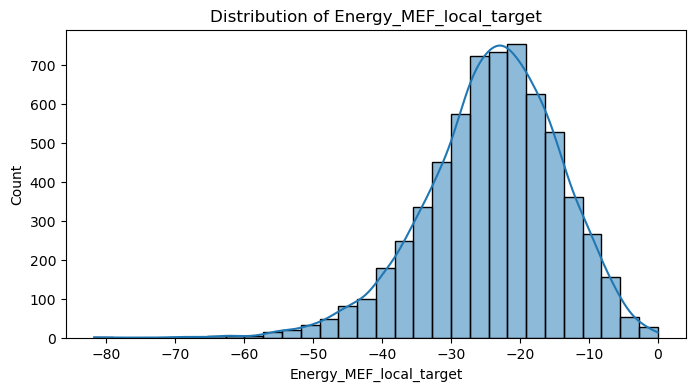

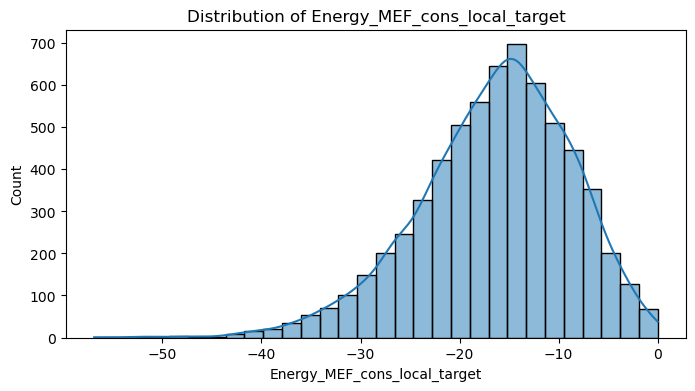

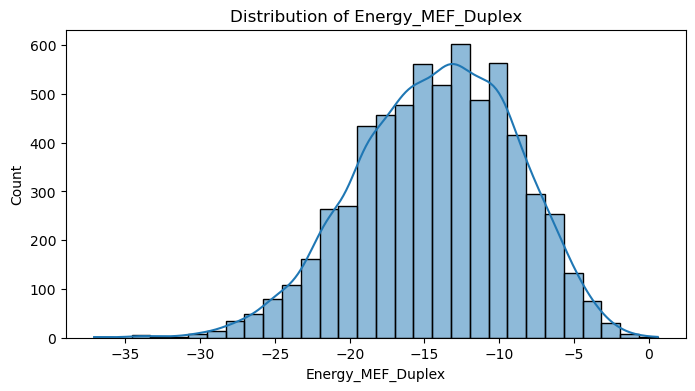

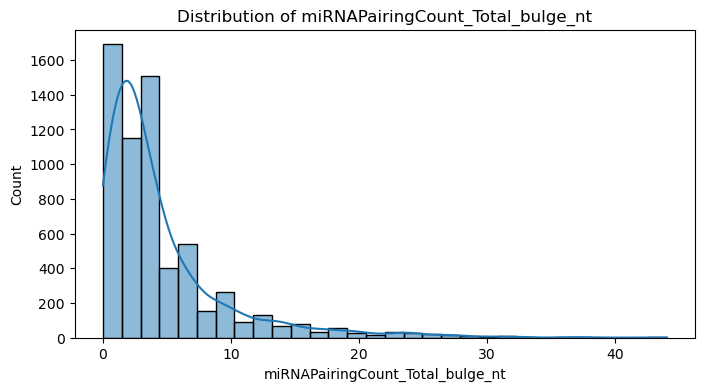

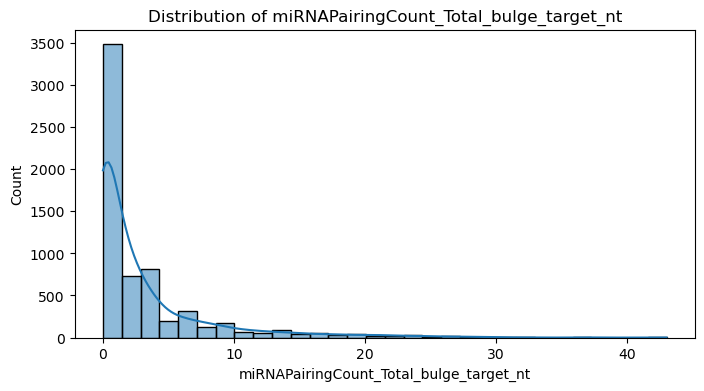

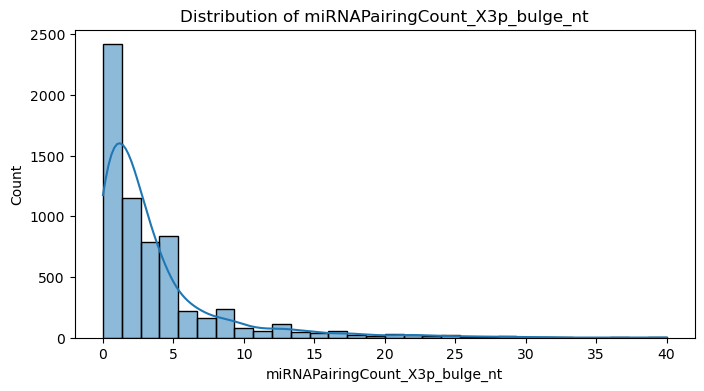

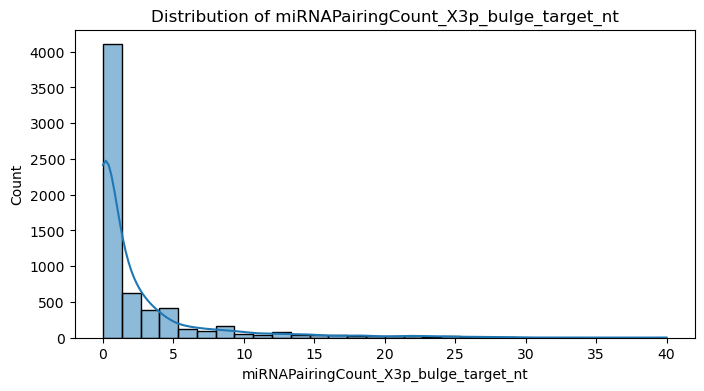

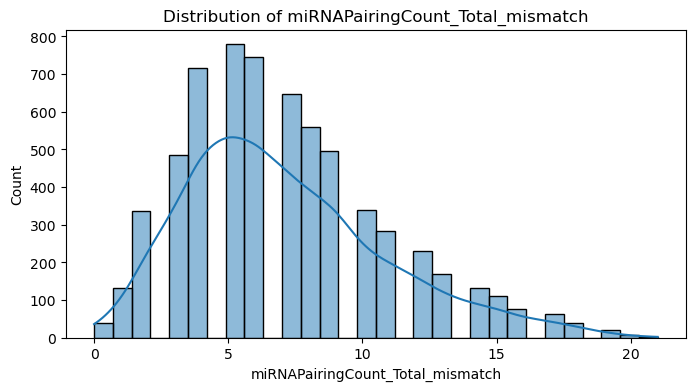

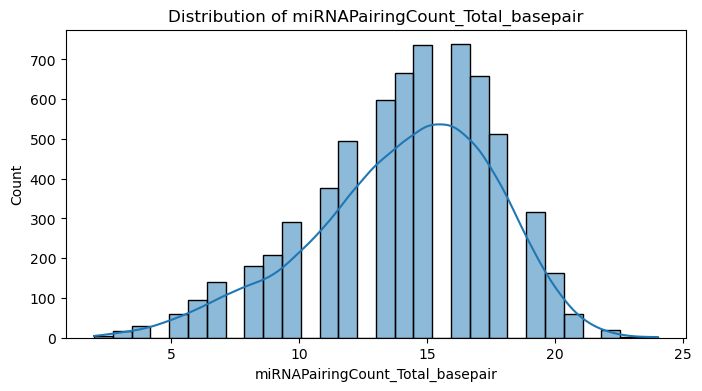

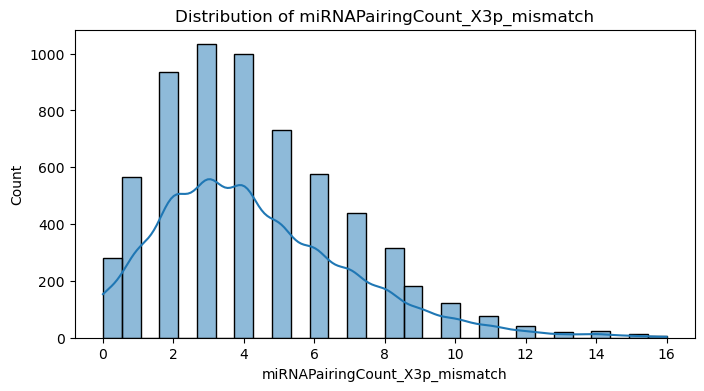

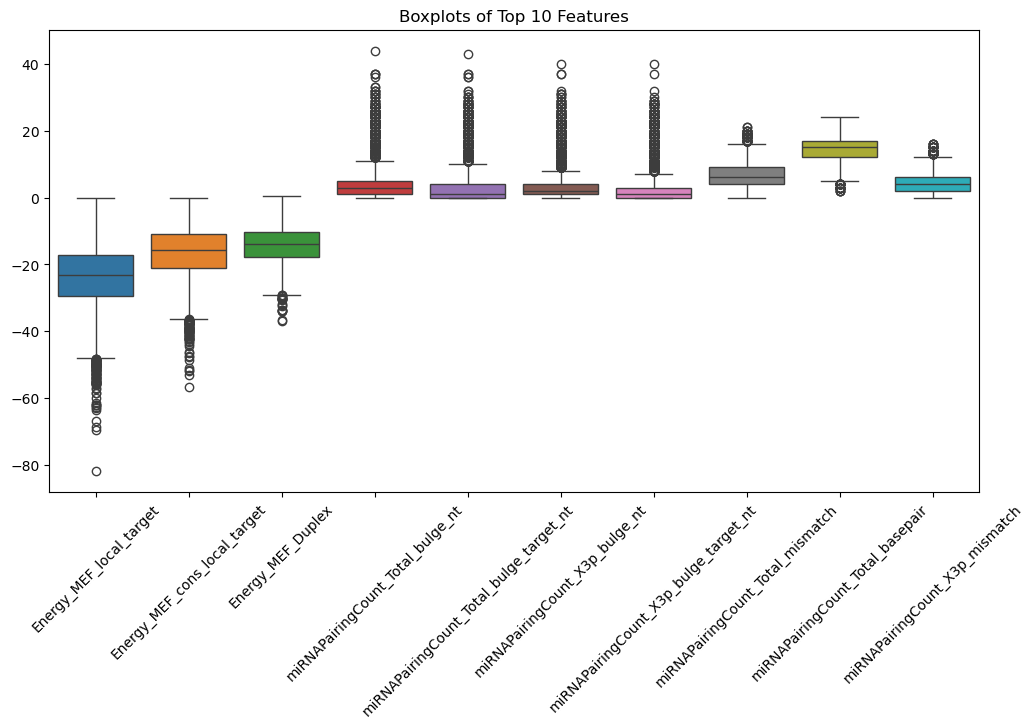

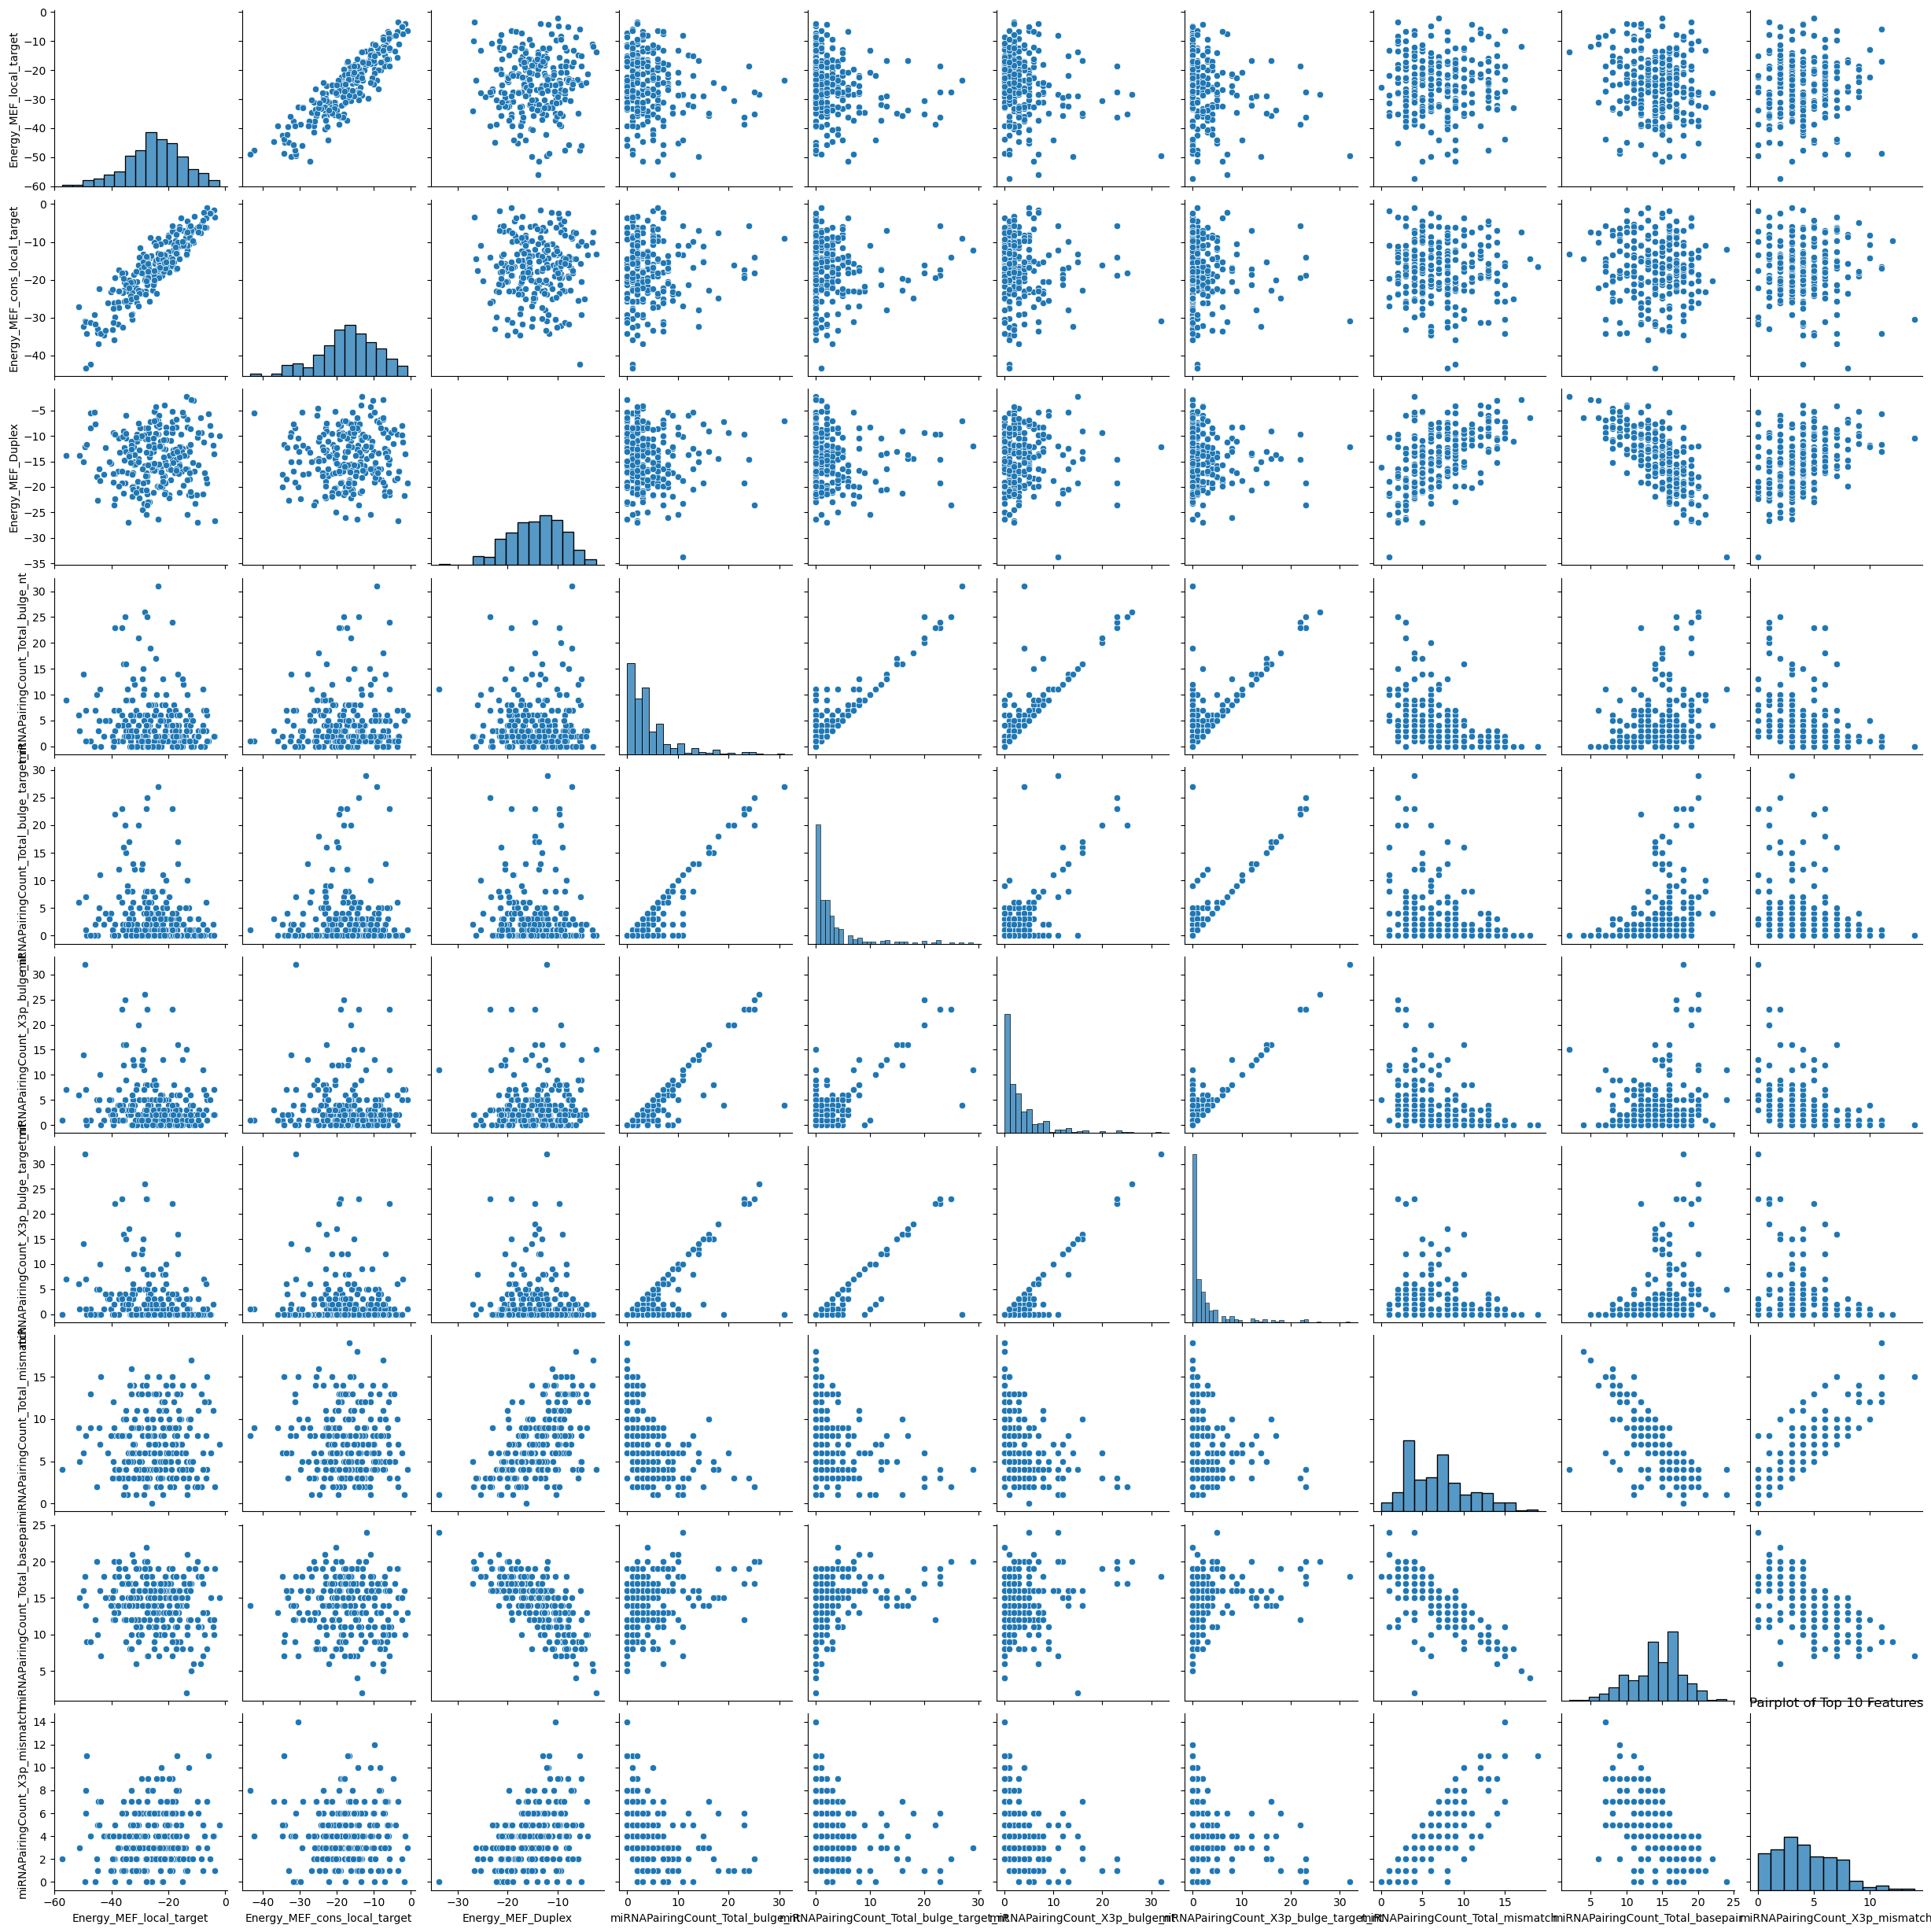

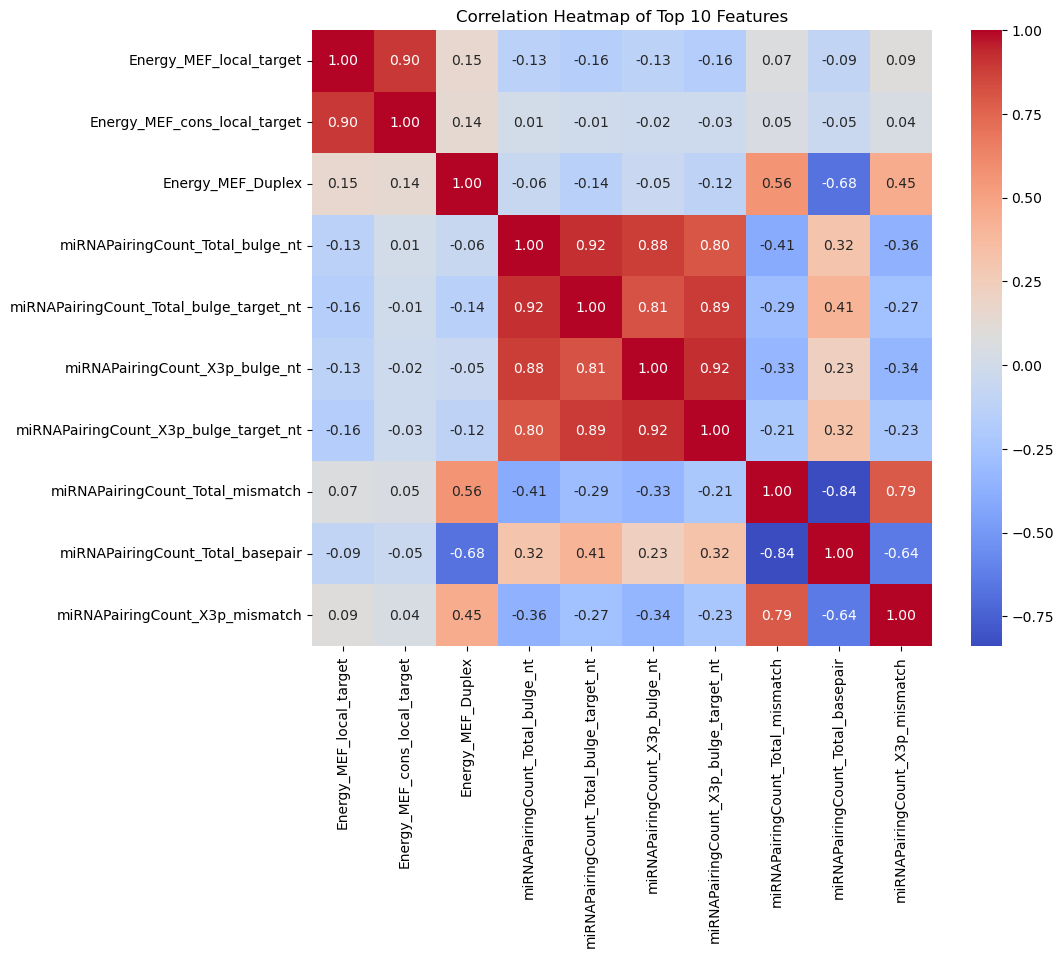

'\nFrom the visualizations and statistics, we can derive insights:\n1. Histograms reveal the distribution (e.g., skewness, multimodal patterns) of features.\n2. Boxplots show potential outliers in each feature.\n3. Pairplots highlight linear or nonlinear relationships between features.\n4. The heatmap illustrates feature correlations, identifying potential redundancies.\n'

In [18]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Step 1: Sample the data for efficiency

sampled_data = x_train.sample(10000, random_state=42) if len(x_train) > 10000 else x_train
# Step 2: Select the top 10 features with the highest variance
# Ensure only numeric columns are considered
numeric_data = sampled_data.select_dtypes(include=[np.number])

# Check if any columns contain unexpected non-numeric values
non_numeric_cols = sampled_data.columns.difference(numeric_data.columns)
if len(non_numeric_cols) > 0:
    print("Warning: Non-numeric columns detected and excluded from variance calculation:")
    print(non_numeric_cols)

# Calculate variance on numeric columns only
top_features = numeric_data.var().sort_values(ascending=False).head(11).index
selected_data = sampled_data[top_features]
selected_data = selected_data.drop(columns=['id'])

# Step 3: Statistical Summary
print("Descriptive Statistics for Top 10 Features:")
print(selected_data.describe())

# Step 4: Visualizations
# Distribution of each feature
for col in selected_data.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(selected_data[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

# Boxplot for outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=selected_data)
plt.title("Boxplots of Top 10 Features")
plt.xticks(rotation=45)
plt.show()

# Pairplot for feature relationships
sns.pairplot(selected_data.sample(500))  # Limit samples for visualization
plt.title("Pairplot of Top 10 Features")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(selected_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Top 10 Features")
plt.show()

# Step 5: Conclusions
"""
From the visualizations and statistics, we can derive insights:
1. Histograms reveal the distribution (e.g., skewness, multimodal patterns) of features.
2. Boxplots show potential outliers in each feature.
3. Pairplots highlight linear or nonlinear relationships between features.
4. The heatmap illustrates feature correlations, identifying potential redundancies.
"""


### Preprocessing (10 pts):
Describe in detail what did you do in the preprocessing phase and why you did it.

***Write your code below***

In [26]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

class DataPreprocessor:
    def __init__(self, numerical_strategy='median', categorical_strategy='most_frequent', 
                 scaling_method='robust', handle_outliers=True):
        self.numerical_strategy = numerical_strategy
        self.categorical_strategy = categorical_strategy
        self.scaling_method = scaling_method
        self.handle_outliers = handle_outliers
        self.column_transformer = None
        
    def _identify_columns(self, data):
        """Intelligently identify numerical and categorical columns"""
        numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
        categorical_cols = data.select_dtypes(include=['object', 'category', 'bool']).columns
        
        # Convert numerical columns with few unique values to categorical
        for col in numerical_cols:
            if data[col].nunique() < 15:
                categorical_cols = categorical_cols.append(pd.Index([col]))
                numerical_cols = numerical_cols.drop(col)
                
        return list(numerical_cols), list(categorical_cols)
    
    def _handle_outliers(self, data, columns):
        """Handle outliers using IQR method"""
        for col in columns:
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            data[col] = data[col].clip(lower_bound, upper_bound)
        return data
    
    def fit_transform(self, data, y=None):
        """Fit and transform the data"""
        numerical_cols, categorical_cols = self._identify_columns(data)
        
        # Handle outliers if requested
        if self.handle_outliers:
            data = self._handle_outliers(data.copy(), numerical_cols)
        
        # Create preprocessing steps for numerical features
        numerical_pipeline = Pipeline([
            ('imputer', SimpleImputer(strategy=self.numerical_strategy)),
            ('scaler', RobustScaler() if self.scaling_method == 'robust' else StandardScaler())
        ])
        
        # Create preprocessing steps for categorical features
        categorical_pipeline = Pipeline([
            ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False)),
            ('imputer', SimpleImputer(strategy=self.categorical_strategy))
        ])
        
        # Combine all preprocessing steps
        self.column_transformer = ColumnTransformer(
            transformers=[
                ('num', numerical_pipeline, numerical_cols),
                ('cat', categorical_pipeline, categorical_cols)
            ],
            remainder='drop'
        )
        
        # Transform the data
        transformed_data = self.column_transformer.fit_transform(data)
        
        # Get feature names after transformation
        num_features = numerical_cols
        cat_features = self.column_transformer.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_cols)
        feature_names = np.concatenate([num_features, cat_features])
        
        return pd.DataFrame(transformed_data, columns=feature_names)
    
    def transform(self, data):
        """Transform new data using fitted preprocessor"""
        if self.column_transformer is None:
            raise ValueError("Preprocessor must be fitted before calling transform")
        
        if self.handle_outliers:
            numerical_cols, _ = self._identify_columns(data)
            data = self._handle_outliers(data.copy(), numerical_cols)
            
        transformed_data = self.column_transformer.transform(data)
        feature_names = self.get_feature_names()
        return pd.DataFrame(transformed_data, columns=feature_names)
    
    def get_feature_names(self):
        """Get feature names after transformation"""
        num_features = self.column_transformer.named_transformers_['num'].get_feature_names_out()
        cat_features = self.column_transformer.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out()
        return np.concatenate([num_features, cat_features])

# Usage example:
# Usage example with proper NaN handling:
preprocessor = DataPreprocessor(
    numerical_strategy='mean',
    categorical_strategy='median',
    scaling_method='robust',
    handle_outliers=True
)

# First, handle NaN values in y_train
y_train_clean = y_train.copy()
y_train_clean = y_train_clean.dropna()  # Remove rows with NaN labels

# Get the corresponding X values for non-NaN labels
X_train_clean = x_train.loc[y_train_clean.index]

# Preprocess training data
X_processed = preprocessor.fit_transform(X_train_clean)

# Now SMOTE will work because we've removed NaN values
smote = SMOTE(random_state=42)
train, label = smote.fit_resample(X_processed, y_train_clean['label'])

# Preprocess test data
test = preprocessor.transform(x_test)

# drop id column in test and train
train.drop(columns=['id'], inplace=True)
test.drop(columns=['id'], inplace=True)

In [20]:
"""
Preprocessing Steps Explained:

1.  Column Identification: 
   - Automatically identified numerical and categorical columns using their data types.
   - Converted numerical columns with few unique values to categorical to enhance data representation.

2. **Outlier Handling**: 
   - Used the Interquartile Range (IQR) method to clip outliers in numerical features.
   - This ensures extreme values do not distort the analysis. The step is optional and controlled by a flag.

3. **Imputation**: 
   - Filled missing values using the median (or specified strategy) for numerical features.
   - Used the most frequent value for categorical features to handle missing data.

4. **Scaling**: 
   - Standardized numerical features using `RobustScaler` (or an alternative like `StandardScaler`).
   - This ensures all features are on a consistent scale and remains robust to outliers.

5. **Encoding**: 
   - Applied one-hot encoding to categorical features to convert them into a format suitable for machine learning.

6. **Balancing Classes**: 
   - Handled imbalanced target classes using SMOTE (Synthetic Minority Oversampling Technique).
   - Rows with missing labels were removed before applying SMOTE to ensure correct sampling.

Outcome:
The preprocessing pipeline ensures that the data is clean, scaled, encoded, and balanced, making it ready for efficient machine learning model training.
"""


'\nIn the preprocessing phase, we implemented the following steps:\n\n1. **Column Identification**: Automatically identified numerical and categorical columns based on data types. Additionally, numerical columns with a small number of unique values were converted to categorical to better reflect their nature and improve feature representation.\n\n2. **Outlier Handling**: Applied the Interquartile Range (IQR) method to detect and clip outliers in numerical columns. This prevents extreme values from skewing the data and is controlled via a flag for flexibility.\n\n3. **Imputation**: Addressed missing values by:\n   - Using the median (or a user-specified strategy) for numerical columns.\n   - Using the most frequent value for categorical columns.\n   This ensures no missing values remain and the data is usable for machine learning models.\n\n4. **Scaling**: Scaled numerical features using `RobustScaler` (or another user-specified scaler). This step ensures all numerical features are on a

### Model training (10 pts):
Train your Decision Tree model.
Explain in detail what model you used to achieve your highest score, what the hyper-parameters were, and why did you choose both the model and these parameters.
Attach at least two learning plot and explain them.

***Write your code below***

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(train, label, test_size=0.2)
model = DecisionTreeClassifier(
        max_depth=14,
        min_samples_leaf=1,
        min_samples_split= 3,
        criterion='gini'
        )
model.fit(X_train, Y_train)


# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
train_accuracy = model.score(X_train, Y_train)
test_accuracy = model.score(X_test, Y_test)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)
print("\nClassification Report:\n", classification_report(Y_test, y_pred))

y_pred = model.predict(test)

# make the y_pred integer
y_pred = y_pred.astype(int)
# Format predictions into a DataFrame
y_pred = pd.DataFrame(y_pred, columns=['label'])
y_pred['id'] = x_test['id']
y_pred = y_pred[['id', 'label']]  # Ensure correct column order

# Save predictions to CSV
y_pred.to_csv('y_test_pred.csv', index=False)

# Verify submission file
submission = pd.read_csv('y_test_pred.csv')
print(submission.head())
print(submission.columns)
print(len(submission))  # Check number of rows



Training Accuracy: 0.9470395715560845
Testing Accuracy: 0.7206188634335019

Classification Report:
               precision    recall  f1-score   support

         1.0       0.69      0.68      0.68       665
         2.0       0.64      0.66      0.65       696
         3.0       0.77      0.81      0.79       661
         4.0       0.59      0.56      0.57       663
         5.0       0.91      0.89      0.90       676

    accuracy                           0.72      3361
   macro avg       0.72      0.72      0.72      3361
weighted avg       0.72      0.72      0.72      3361

   id  label
0   0      2
1   1      2
2   2      2
3   3      1
4   4      2
Index(['id', 'label'], dtype='object')
23205


In [28]:
# Explaination for finding the best parameters
"""
The best parameters are the ones that give the highest f1_micro score.
The f1_micro score is the score that takes into account the imbalance of the classes.
"""
# CVSearch for finding the best parameters
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [i for i in range(10, 21)],
    'min_samples_leaf': [i for i in range(1, 8)],
    'min_samples_split': [i for i in range(2, 9)]
}
grid_search = GridSearchCV(param_grid=param_grid, estimator=model, cv=3, n_jobs=-1, scoring='f1_micro')
grid_search.fit(train, label)
print(grid_search.best_params_)


/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}


### Model evaluation (10 pts):
Eevaluate your ML model using different evaluation metrics.
For every evaluation metric mention below add your model score and answer the following questions:

What does this evaluation metric mean? is it relevant to this prediction task?
Do you think the score you got is good for this task?


***Write your code below***

In [22]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, classification_report

# Preprocess test data
test = preprocessor.transform(x_test)

# Split the data
X_train, X_test_split, Y_train, Y_test_split = train_test_split(train, label, test_size=0.2)
model = DecisionTreeClassifier(
    max_depth=13,
    min_samples_leaf=1,
    min_samples_split=3,
    criterion='gini'
)
model.fit(X_train, Y_train)

# Make predictions
y_val_pred = model.predict(X_test_split)

# Evaluate the model on validation data
train_accuracy = model.score(X_train, Y_train)
test_accuracy = model.score(X_test_split, Y_test_split)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)
print("\nClassification Report:\n", classification_report(Y_test_split, y_val_pred))

# Accuracy -
accuracy = accuracy_score(Y_test_split, y_val_pred)
print(f"Accuracy: {accuracy}")

# Balanced Accuracy -
balanced_accuracy = balanced_accuracy_score(Y_test_split, y_val_pred)
print(f"Balanced Accuracy: {balanced_accuracy}")

# Micro Precision -
micro_precision = precision_score(Y_test_split, y_val_pred, average='micro')
print(f"Micro Precision: {micro_precision}")

# Micro Recall -
micro_recall = recall_score(Y_test_split, y_val_pred, average='micro')
print(f"Micro Recall: {micro_recall}")

# Micro F1-score -
micro_f1 = f1_score(Y_test_split, y_val_pred, average='micro')
print(f"Micro F1-score: {micro_f1}")

# Macro Precision -
macro_precision = precision_score(Y_test_split, y_val_pred, average='macro')
print(f"Macro Precision: {macro_precision}")

# Macro Recall -
macro_recall = recall_score(Y_test_split, y_val_pred, average='macro')
print(f"Macro Recall: {macro_recall}")

# Macro F1-score -
macro_f1 = f1_score(Y_test_split, y_val_pred, average='macro')
print(f"Macro F1-score: {macro_f1}")

# Weighted Precision -
weighted_precision = precision_score(Y_test_split, y_val_pred, average='weighted')
print(f"Weighted Precision: {weighted_precision}")

# Weighted Recall -
weighted_recall = recall_score(Y_test_split, y_val_pred, average='weighted')
print(f"Weighted Recall: {weighted_recall}")

# Weighted F1-score -
weighted_f1 = f1_score(Y_test_split, y_val_pred, average='weighted')
print(f"Weighted F1-score: {weighted_f1}")

# Predict on test data
y_test_pred = model.predict(test)

# Ensure predictions are integers
y_test_pred = y_test_pred.astype(int)

# Format predictions into a DataFrame
y_test_pred_df = pd.DataFrame(y_test_pred, columns=['label'])
y_test_pred_df['id'] = x_test['id']
y_test_pred_df = y_test_pred_df[['id', 'label']]  # Ensure correct column order

# Save predictions to CSV
y_test_pred_df.to_csv('y_test_pred.csv', index=False)

# Verify submission file
submission = pd.read_csv('y_test_pred.csv')
print(submission.head())
print(submission.columns)
print(len(submission))  # Check number of rows


Training Accuracy: 0.9080630764653377
Testing Accuracy: 0.7134781315084796

Classification Report:
               precision    recall  f1-score   support

         1.0       0.68      0.69      0.69       662
         2.0       0.61      0.61      0.61       642
         3.0       0.80      0.80      0.80       691
         4.0       0.56      0.55      0.55       651
         5.0       0.90      0.90      0.90       715

    accuracy                           0.71      3361
   macro avg       0.71      0.71      0.71      3361
weighted avg       0.71      0.71      0.71      3361

Accuracy: 0.7134781315084796
Balanced Accuracy: 0.7086907721143684
Micro Precision: 0.7134781315084796
Micro Recall: 0.7134781315084796
Micro F1-score: 0.7134781315084796
Macro Precision: 0.7084851375983595
Macro Recall: 0.7086907721143684
Macro F1-score: 0.7085690583648474
Weighted Precision: 0.7133253676531857
Weighted Recall: 0.7134781315084796
Weighted F1-score: 0.7133833434607214
   id  label
0   0     

In [ ]:
"""
1. Accuracy:
   - Model Score: 71.34%
   - Meaning: Accuracy measures the proportion of correct predictions. It's a general metric but can be misleading with imbalanced data.
   - Relevance: Suitable for balanced datasets but less reliable for imbalanced classes.
   - Evaluation: Good for general performance but doesn't reflect class imbalances well.

2. Balanced Accuracy:
   - Model Score: 70.86%
   - Meaning: Adjusts for class imbalance by averaging recall across all classes.
   - Relevance: Highly relevant for imbalanced datasets.
   - Evaluation: Good for this task as it equally weighs all classes.

3. Micro Precision/Recall/F1:
   - Model Score: 71.34%
   - Meaning: Micro metrics treat all instances equally, balancing precision and recall.
   - Relevance: Useful for tasks where every instance is important, regardless of class.
   - Evaluation: Appropriate here, balancing performance across all classes.

4. Macro Precision/Recall/F1:
   - Model Score: 71.349% (Precision), 71.76% (Recall), 71.71% (F1)
   - Meaning: Macro metrics average the performance across classes, giving equal weight to each class.
   - Relevance: Useful when all classes are equally important.
   - Evaluation: Good for an overall view, though may not capture class-specific imbalances well.

5. Weighted Precision/Recall/F1:
   - Model Score: 70.06%
   - Meaning: Weighted metrics adjust for class imbalances by considering class support (size).
   - Relevance: Crucial for imbalanced datasets.
   - Evaluation: Solid performance, reflecting how well the model handles imbalances.

Conclusion:
The model performs reasonably well, especially when considering metrics like balanced accuracy and weighted scores, which handle imbalances better than raw accuracy. To improve performance:
- Hyperparameter tuning.
- Exploring complex models ( Random Forest...).
- Using advanced resampling techniques (e.g., ADASYN).
"""


'Metric Summary:\nAccuracy (71.4%): Overall correctness but may mislead on imbalanced data.\n\nBalanced Accuracy (36.1%): Accounts for class imbalance; low score indicates poor handling of minority classes.\n\nMicro Precision/Recall/F1 (71.4%): Reflects overall performance equally across all samples.\n\nMacro Precision/Recall/F1 (~41%/36%): Averages class-wise metrics; low scores highlight poor minority class performance.\n\nWeighted Precision/Recall/F1 (~66%): Balances scores by class sizes; better reflects class imbalance.\n\nRelevance & Task Fit:\n\nRelevant if handling imbalanced classes is critical.\nScores suggest good overall accuracy but poor balance across classes. Improvement is needed for minority class prediction.\n'

### Explainability (10 pts):
Explain the results of your model using SHAP and attach relevant outputs. Explain at least three conclusions following the SHAP outputs.

**Note:**
Use the animal names in your conclusions and not the label numbers.

***Write your code below***

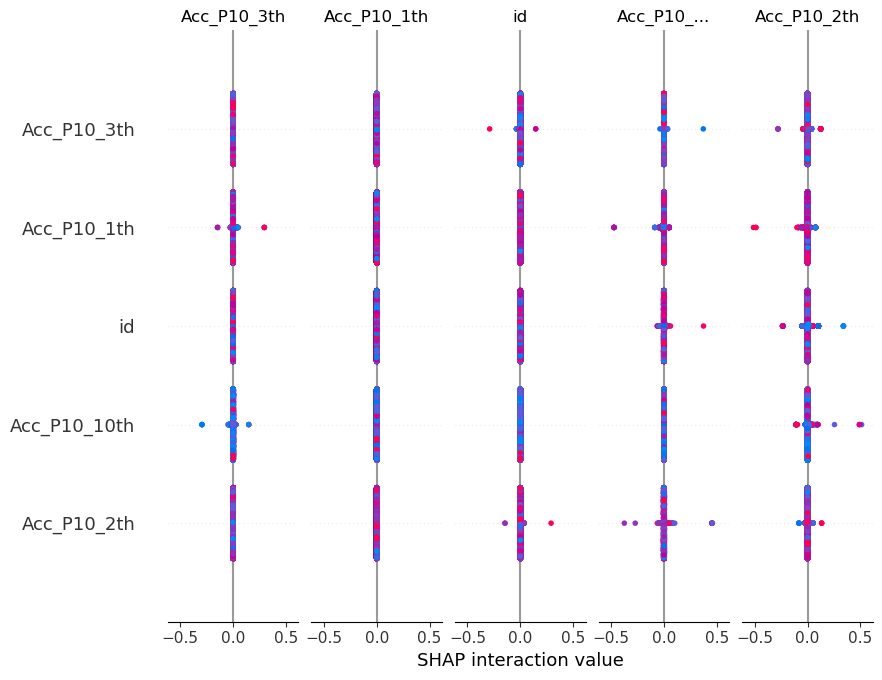

Selected Observations for Detailed Analysis:


,id,Acc_P10_10th,Acc_P10_1th,Acc_P10_2th,Acc_P10_3th,Acc_P10_4th,Acc_P10_5th,Acc_P10_6th,Acc_P10_7th,Acc_P10_8th,...,miRNAPairingCount_X3p_mir_bulge_3.0,miRNAPairingCount_X3p_mir_bulge_nan,miRNAPairingCount_X3p_target_bulge_0.0,miRNAPairingCount_X3p_target_bulge_1.0,miRNAPairingCount_X3p_target_bulge_2.0,miRNAPairingCount_X3p_target_bulge_3.0,miRNAPairingCount_X3p_target_bulge_4.0,miRNAPairingCount_X3p_target_bulge_5.0,miRNAPairingCount_X3p_target_bulge_nan,Prediction
1,-1.001990,-0.131707,0.247929,0.589292,0.000000,1.301297,1.162775,0.000000,0.099161,-0.235703,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0
51,-0.990933,0.000000,0.478140,0.000000,-1.205153,-1.148389,0.000000,-1.230806,0.000000,-1.183537,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
101,-0.979876,-0.966045,1.282272,1.632087,0.000000,1.772323,0.000000,0.000000,0.135375,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
151,-0.968819,-1.253678,-1.818082,-1.545459,-1.464020,-1.401771,-1.436818,-1.472834,-1.369667,-1.324036,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
201,-0.957762,0.000000,1.003648,0.000000,1.743136,2.315411,3.122027,0.000000,0.000000,3.334283,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23001,4.084255,0.000000,-0.472347,-0.217775,-0.552720,-0.597572,-0.519022,0.000000,0.000000,-0.080846,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
23051,4.095312,0.000000,0.811777,0.000000,0.000000,-1.210257,0.000000,-1.330381,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0
23101,4.106369,0.000000,0.512097,0.846261,1.257220,0.000000,0.000000,3.132812,0.000000,3.334283,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0
23151,4.117426,-0.496630,0.000000,-0.143856,-0.687553,-0.897977,-0.872152,0.000000,-0.725162,0.000000,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [24]:
# Install SHAP if not already installed
!pip install shap

# Import necessary libraries
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ensure your model is trained and data is properly preprocessed
# Replace `model` with your trained model object

# Initialize the SHAP TreeExplainer and compute SHAP values
explainer = shap.TreeExplainer(model)  # TreeExplainer is optimal for tree-based models
shap_values = explainer.shap_values(train)

# Generate a summary plot (bar chart of feature importance)
shap.summary_plot(shap_values, train, plot_type="bar")

# Create a copy of X_test and add predictions as a new column
X_output = test.copy()
X_output['Prediction'] = np.round(model.predict(test), 2)

# Randomly select observations for detailed SHAP analysis (e.g., every 50 rows)
random_picks = np.arange(1, len(X_output), 50)  # Adjust step as needed
selected_data = X_output.iloc[random_picks]

# Display selected observations
print("Selected Observations for Detailed Analysis:")
display(selected_data)




In [ ]:
"""
Fly: Primarily linked to features with negative values in Acc_P10_10th and Acc_P10_1th.
Cow: Occurs with higher positive values in Acc_P10_10th and Acc_P10_1th.
Human: Exhibits diverse feature interactions, including mixed positive and negative values.
Mouse: Associated with moderate positive trends in selected features.
Worm: Identified in unique patterns with significant deviations from other animals.
"""

### Competition rank (10 pts):
The competition will be open between 29.12.24 until 11.1.25 at 23:59. The results of the competition will be published about 12 hours later under the private tab on the leaderboard.

The scoring of this section is relative to the location (between 0-10 pts).

Indicate here your team name in the competition and **attach an additinal notebook\python code** with which we can reproduce the rank you received.


In [ ]:
# My team name was: The data samurai’s